### Here, we will go over simple documents query.
### we try to find the best way to find out which one of the documents is closer to the query string.


In [2]:
import math, json
import numpy as np
import matplotlib.pyplot as plt


In [6]:

queryVector = {}

path = 'datasets/Documents.json'
f = open(path,'r') 
data = json.load(f) 

query = 'computer science'

query = 'a b c'

doc1 = data['Doc1'].lower()
doc2 = data['Doc2'].lower()
doc3 = data['Doc3'].lower()
doc4 = data['Doc4'].lower()
doc4 = 'a a a b c c '


query = query.split()
print(query)

['a', 'b', 'c']


In [7]:
# we calculate the frequecny of the query words in each documents and return them as a vector

def words2vector(text):
         
    vector = 
    for w in query:
        for word in text.split():
            if word == w:
                vector[query.index(word)] = vector[query.index(word)] + 1
       
       
    return vector
    

print(words2vector(doc1))
print(words2vector(doc2))
print(words2vector(doc3))
print(words2vector(doc4))

[0, 0, 0]
[0, 0, 0]
[1, 0, 0]
[3, 1, 2]


red:query, blue: document 1


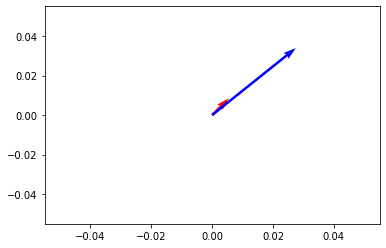

red:query, blue: document 2


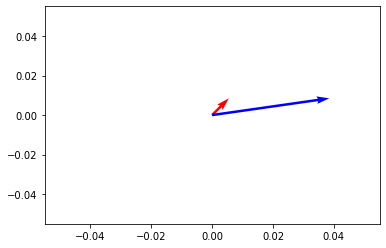

red:query, blue: document 3


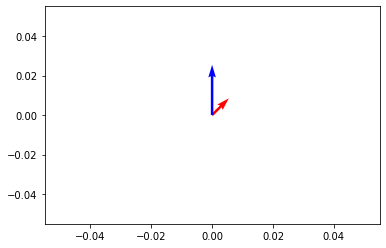

In [263]:
# basic vector plot

document1 = words2vector(doc1)
document2 = words2vector(doc2)
document3 = words2vector(doc3)
document4 = words2vector(doc4)


print('red:query, blue: document 1')
V = np.array([[1,1],document1])
origin = [0], [0] # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=20)
plt.show()

print('red:query, blue: document 2')
V = np.array([[1,1],document2])
origin = [0], [0] # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=20)
plt.show()

print('red:query, blue: document 3')
V = np.array([[1,1],document3])
origin = [0], [0] # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=20)
plt.show()

In [264]:
# Finding the distance between thr query vectors and documents vectors

def euclidean_distance(document):
    
    query = [1, 1]
    sq_length = 0
 
    for index in range(0, len(query)):
        sq_length += math.pow((document[index] - query[index]), 2)
        
    return math.sqrt(sq_length)
        
        
print (euclidean_distance(document1))
print (euclidean_distance(document2))
print (euclidean_distance(document3))
print (euclidean_distance(document4))

5.0
6.0
2.23606797749979
1.4142135623730951


##### AFTER Checking the graphs and calculate distance we notice that:
- in doc1 the word computer mentioned 5 times and word science mentioned 4 times, the graph shows that the angle between the query and doc1 is close, we notice that the vector is between the x-axis and y-axis, and the distance caculated between the two vectors is 5 (a bit high considring the other docs). 

- in doc2 we the word computer mentioned 7 times and the word science 1 time, we can till from the graph that the angle between the query and doc2 is large, also we notice the vector is close to the x-axis, and our distance calculation gives 6 (highest so far).

- in doc3 the word computer was mentioned 0 times while the word science was mentioned 3 times, as expected the graph shows that the graph is closer to one axis more than the other, y-axis in this case, we can notice a large angle between them but the distance calculation gives us 2.

##### WHAT if the query words was repeated ? 
- the distance change dramatically since the query vectors changed,now thats an issue and tell us that the distance measure isnt stable.

##### I qoute from my favortie book(source at the end) :

- "Vectors representing documents can get longer without any conceptually interesting reasons. For example, longer documents will have longer vectors: each word in a longer document has a higher chance of occurrence and will most likely have higher counts. Therefore, it is much more informative to measure not the absolute distance that can be dependent on the length of the documents, but the angle between the length-normalised vectors, that is vectors made comparable in terms of their lengths."

##### IF we changed the query vectors to higher numbers, we will notice a change in distance but not in angle, so why dont we use it.
##### Here we are going for cosine similiarty.


In [270]:
document = document1
query = [1, 1]


 
def length(vector):
    
    if sum(vector) != 0:
    
        sq_length = 0
        for index in range(0, len(vector)):
            sq_length += math.pow(vector[index], 2)
        return math.sqrt(sq_length)
    else: return 1
   
def dot_product(vector1, vector2):
    if len(vector1)==len(vector2):
        dot_prod = 0
        for index in range(0, len(vector1)):
            dot_prod += vector1[index]*vector2[index]
        return dot_prod
    else:
        return "Unmatching dimensionality"
 

pro = dot_product(query, document)
leng = (length(query)*length(document))

cosine= pro/leng
print (cosine)



0.9938837346736188


based on the cosine similarty we know that:

- doc1 has 99% similairty 
- doc2 has 79% similairty 
- doc3 has 70% similairty 

which makes more sense when we look into the graphs.

In [272]:
# im following the below book:
# Getting Started with Natural Language Processing by Ekaterina Kochmar 